In [353]:
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'test'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/MyDrive/{}'.format(FOLDERNAME))

%cd /content/drive/MyDrive/$FOLDERNAME

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/test


In [354]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [355]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [356]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [358]:
import requests
import json

state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

In [359]:
gg_apt = pd.read_csv('/content/drive/MyDrive/신한AI/경기도/경기_아파트(전월세)_실거래가_20230424123754.csv', encoding = 'cp949', error_bad_lines=False, warn_bad_lines=False)
gg_op = pd.read_csv('/content/drive/MyDrive/신한AI/경기도/경기_오피스텔(전월세)_실거래가_20230424123952.csv', encoding = 'cp949', error_bad_lines=False, warn_bad_lines=False)
gg_multi = pd.read_csv('/content/drive/MyDrive/신한AI/경기도/경기_연립다세대(전월세)_실거래가_20230424123846.csv', encoding = 'cp949', error_bad_lines=False, warn_bad_lines=False)
gg_single = pd.read_csv('/content/drive/MyDrive/신한AI/경기도/경기_단독다가구(전월세)_실거래가_20230424123933.csv', encoding = 'cp949', error_bad_lines=False, warn_bad_lines=False)

<ipython-input-359-74465b988640>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  gg_apt = pd.read_csv('/content/drive/MyDrive/신한AI/경기도/경기_아파트(전월세)_실거래가_20230424123754.csv', encoding = 'cp949', error_bad_lines=False, warn_bad_lines=False)
<ipython-input-359-74465b988640>:1: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  gg_apt = pd.read_csv('/content/drive/MyDrive/신한AI/경기도/경기_아파트(전월세)_실거래가_20230424123754.csv', encoding = 'cp949', error_bad_lines=False, warn_bad_lines=False)
<ipython-input-359-74465b988640>:1: DtypeWarning: Columns (2,18) have mixed types. Specify dtype option on import or set low_memory=False.
  gg_apt = pd.read_csv('/content/drive/MyDrive/신한AI/경기도/경기_아파트(전월세)_실거래가_20230424123754.csv', encoding = 'cp949', error_ba

In [360]:
seoul_apt = pd.read_csv('/content/drive/MyDrive/신한AI/서울/서울_아파트(전월세)_실거래가_20230424123447.csv', encoding = 'cp949', error_bad_lines=False, warn_bad_lines=False)
seoul_op = pd.read_csv('/content/drive/MyDrive/신한AI/서울/서울_오피스텔(전월세)_실거래가_20230424123123.csv', encoding = 'cp949', error_bad_lines=False, warn_bad_lines=False)
seoul_multi = pd.read_csv('/content/drive/MyDrive/신한AI/서울/서울_연립다세대(전월세)_실거래가_20230424123211.csv', encoding = 'cp949', error_bad_lines=False, warn_bad_lines=False)
seoul_single = pd.read_csv('/content/drive/MyDrive/신한AI/서울/서울_단독다가구(전월세)_실거래가_20230424123530.csv', encoding = 'cp949', error_bad_lines=False, warn_bad_lines=False)

<ipython-input-360-0a6b889d65d5>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  seoul_apt = pd.read_csv('/content/drive/MyDrive/신한AI/서울/서울_아파트(전월세)_실거래가_20230424123447.csv', encoding = 'cp949', error_bad_lines=False, warn_bad_lines=False)
<ipython-input-360-0a6b889d65d5>:1: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  seoul_apt = pd.read_csv('/content/drive/MyDrive/신한AI/서울/서울_아파트(전월세)_실거래가_20230424123447.csv', encoding = 'cp949', error_bad_lines=False, warn_bad_lines=False)
<ipython-input-360-0a6b889d65d5>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  seoul_apt = pd.read_csv('/content/drive/MyDrive/신한AI/서울/서울_아파트(전월세)_실거래가_20230424123447.csv', encoding = 'cp949', error_b

In [361]:
gg_apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115708 entries, 0 to 115707
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   시군구            115708 non-null  object 
 1   번지             115707 non-null  object 
 2   본번             115708 non-null  object 
 3   부번             115708 non-null  int64  
 4   단지명            115708 non-null  object 
 5   전월세구분          115708 non-null  object 
 6   전용면적(㎡)        115708 non-null  float64
 7   계약년월           115708 non-null  int64  
 8   계약일            115708 non-null  int64  
 9   보증금(만원)        115708 non-null  object 
 10  월세(만원)         115708 non-null  int64  
 11  층              115708 non-null  int64  
 12  건축년도           115685 non-null  float64
 13  도로명            115708 non-null  object 
 14  계약기간           115708 non-null  object 
 15  계약구분           115708 non-null  object 
 16  갱신요구권 사용       115708 non-null  object 
 17  종전계약 보증금 (만원)  93048 non-null

In [362]:
gg_op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21798 entries, 0 to 21797
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시군구            21798 non-null  object 
 1   번지             21583 non-null  object 
 2   본번             21798 non-null  int64  
 3   부번             21798 non-null  int64  
 4   단지명            21798 non-null  object 
 5   전월세구분          21798 non-null  object 
 6   전용면적(㎡)        21798 non-null  float64
 7   계약년월           21798 non-null  int64  
 8   계약일            21798 non-null  int64  
 9   보증금(만원)        21798 non-null  object 
 10  월세(만원)         21798 non-null  int64  
 11  층              21798 non-null  int64  
 12  건축년도           20669 non-null  float64
 13  도로명            21798 non-null  object 
 14  계약기간           21798 non-null  object 
 15  계약구분           21798 non-null  object 
 16  갱신요구권 사용       21798 non-null  object 
 17  종전계약 보증금 (만원)  19948 non-null  object 
 18  종전계약 월

In [363]:
gg_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16047 entries, 0 to 16046
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시군구            16047 non-null  object 
 1   번지             16047 non-null  object 
 2   본번             16047 non-null  int64  
 3   부번             16047 non-null  int64  
 4   건물명            16047 non-null  object 
 5   전월세구분          16047 non-null  object 
 6   전용면적(㎡)        16047 non-null  float64
 7   계약년월           16047 non-null  int64  
 8   계약일            16047 non-null  int64  
 9   보증금(만원)        16047 non-null  object 
 10  월세(만원)         16047 non-null  int64  
 11  층              16047 non-null  int64  
 12  건축년도           16047 non-null  int64  
 13  도로명            16047 non-null  object 
 14  계약기간           16047 non-null  object 
 15  계약구분           16047 non-null  object 
 16  갱신요구권 사용       16047 non-null  object 
 17  종전계약 보증금 (만원)  12017 non-null  object 
 18  종전계약 월

In [364]:
gg_single.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38212 entries, 0 to 38211
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시군구            38212 non-null  object 
 1   번지             38204 non-null  object 
 2   도로조건           38212 non-null  object 
 3   계약면적(㎡)        38212 non-null  float64
 4   전월세구분          38212 non-null  object 
 5   계약년월           38212 non-null  int64  
 6   계약일            38212 non-null  int64  
 7   보증금(만원)        38212 non-null  object 
 8   월세(만원)         38212 non-null  int64  
 9   건축년도           36076 non-null  float64
 10  도로명            35005 non-null  object 
 11  계약기간           38212 non-null  object 
 12  계약구분           38212 non-null  object 
 13  갱신요구권 사용       38212 non-null  object 
 14  종전계약 보증금 (만원)  28876 non-null  object 
 15  종전계약 월세 (만원)   28876 non-null  float64
dtypes: float64(3), int64(3), object(10)
memory usage: 4.7+ MB


In [365]:
seoul_apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87763 entries, 0 to 87762
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시군구            87763 non-null  object 
 1   번지             87683 non-null  object 
 2   본번             87753 non-null  float64
 3   부번             87753 non-null  float64
 4   단지명            87763 non-null  object 
 5   전월세구분          87763 non-null  object 
 6   전용면적(㎡)        87763 non-null  float64
 7   계약년월           87763 non-null  int64  
 8   계약일            87763 non-null  int64  
 9   보증금(만원)        87763 non-null  object 
 10  월세(만원)         87763 non-null  object 
 11  층              87763 non-null  int64  
 12  건축년도           87753 non-null  float64
 13  도로명            87763 non-null  object 
 14  계약기간           87763 non-null  object 
 15  계약구분           87763 non-null  object 
 16  갱신요구권 사용       87763 non-null  object 
 17  종전계약 보증금 (만원)  73786 non-null  object 
 18  종전계약 월

In [366]:
seoul_op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22268 entries, 0 to 22267
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시군구            22268 non-null  object 
 1   번지             22254 non-null  object 
 2   본번             22268 non-null  int64  
 3   부번             22268 non-null  int64  
 4   단지명            22268 non-null  object 
 5   전월세구분          22268 non-null  object 
 6   전용면적(㎡)        22268 non-null  float64
 7   계약년월           22268 non-null  int64  
 8   계약일            22268 non-null  int64  
 9   보증금(만원)        22268 non-null  object 
 10  월세(만원)         22268 non-null  int64  
 11  층              22268 non-null  int64  
 12  건축년도           21436 non-null  float64
 13  도로명            22268 non-null  object 
 14  계약기간           22268 non-null  object 
 15  계약구분           22268 non-null  object 
 16  갱신요구권 사용       22268 non-null  object 
 17  종전계약 보증금 (만원)  19685 non-null  object 
 18  종전계약 월

In [367]:
seoul_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37553 entries, 0 to 37552
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시군구            37553 non-null  object 
 1   번지             37553 non-null  object 
 2   본번             37553 non-null  int64  
 3   부번             37553 non-null  int64  
 4   건물명            37553 non-null  object 
 5   전월세구분          37553 non-null  object 
 6   전용면적(㎡)        37553 non-null  float64
 7   계약년월           37553 non-null  int64  
 8   계약일            37553 non-null  int64  
 9   보증금(만원)        37553 non-null  object 
 10  월세(만원)         37553 non-null  object 
 11  층              37553 non-null  int64  
 12  건축년도           37531 non-null  float64
 13  도로명            37553 non-null  object 
 14  계약기간           37553 non-null  object 
 15  계약구분           37553 non-null  object 
 16  갱신요구권 사용       37553 non-null  object 
 17  종전계약 보증금 (만원)  30659 non-null  object 
 18  종전계약 월

In [368]:
seoul_single.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50639 entries, 0 to 50638
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시군구            50639 non-null  object 
 1   번지             50637 non-null  object 
 2   도로조건           50639 non-null  object 
 3   계약면적(㎡)        50639 non-null  float64
 4   전월세구분          50639 non-null  object 
 5   계약년월           50639 non-null  int64  
 6   계약일            50639 non-null  int64  
 7   보증금(만원)        50639 non-null  object 
 8   월세(만원)         50639 non-null  object 
 9   건축년도           48249 non-null  float64
 10  도로명            45522 non-null  object 
 11  계약기간           50639 non-null  object 
 12  계약구분           50639 non-null  object 
 13  갱신요구권 사용       50639 non-null  object 
 14  종전계약 보증금 (만원)  37844 non-null  object 
 15  종전계약 월세 (만원)   37844 non-null  float64
dtypes: float64(3), int64(2), object(11)
memory usage: 6.2+ MB


In [369]:
seoul_single.sample(n=5)

,시군구,번지,도로조건,계약면적(㎡),전월세구분,계약년월,계약일,보증금(만원),월세(만원),건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금 (만원),종전계약 월세 (만원)
32596,서울특별시 서대문구 창천동,6*,8m미만,17.00,월세,202301,7,"1,000",50,1987.0,신촌로9길,202302~202402,신규,-,0,0.0
30025,서울특별시 마포구 상수동,3**,8m미만,35.00,월세,202302,8,"1,000",70,1992.0,와우산로3안길,202302~202502,신규,-,0,0.0
28343,서울특별시 동작구 상도동,2**,8m미만,49.67,월세,202212,16,"2,000",80,1971.0,국사봉길,202302~202502,신규,-,0,0.0
30808,서울특별시 마포구 연남동,5**,12m미만,18.00,월세,202301,10,"1,000",45,2010.0,연남로3길,202301~202501,신규,-,0,0.0
41815,서울특별시 영등포구 당산동1가,9*,-,38.85,전세,202302,27,"12,000",0,1993.0,NaN,-,-,-,NaN,NaN


In [370]:
gg_apt['구분'] = '아파트'
gg_op['구분'] = '오피스텔'
gg_multi['구분'] = '연립다세대'
gg_single['구분'] = '단독다가구'
seoul_apt['구분'] = '아파트'
seoul_op['구분'] = '오피스텔'
seoul_multi['구분'] = '연립다세대'
seoul_single['구분'] = '단독다가구'

In [371]:
# gg_ = pd.concat([gg_apt, gg_op, gg_multi, gg_single])
gg_ = pd.concat([gg_apt, gg_op, gg_multi])

In [372]:
# seoul_ = pd.concat([seoul_apt, seoul_op, seoul_multi, seoul_single])
seoul_ = pd.concat([seoul_apt, seoul_op, seoul_multi])

In [373]:
gg_['보증금(만원)'] = gg_['보증금(만원)'].astype('str')
gg_['월세(만원)'] = gg_['월세(만원)'].astype('str')
gg_['보증금(만원)'] = gg_['보증금(만원)'].str.replace(',','').astype('int64')
gg_['월세(만원)'] = gg_['월세(만원)'].str.replace(',','').astype('int64')

In [374]:
seoul_['보증금(만원)'] = seoul_['보증금(만원)'].astype('str')
seoul_['월세(만원)'] = seoul_['월세(만원)'].astype('str')
seoul_['보증금(만원)'] = seoul_['보증금(만원)'].str.replace(',','').astype('int64')
seoul_['월세(만원)'] = seoul_['월세(만원)'].str.replace(',','').astype('int64')

In [375]:
seoul_['계약년월'] = seoul_['계약년월'].astype('str')
seoul_['년도'] = seoul_['계약년월'].str[0:4].astype('int64')
seoul_['월'] = seoul_['계약년월'].str[4:].astype('int64')
gg_['계약년월'] = gg_['계약년월'].astype('str')
gg_['년도'] = gg_['계약년월'].str[0:4].astype('int64')
gg_['월'] = gg_['계약년월'].str[4:].astype('int64')
seoul_ = seoul_.drop(['계약년월'],axis=1)
gg_ = gg_.drop(['계약년월'],axis=1)

In [376]:
gg_.sample(n=5)

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약일,보증금(만원),월세(만원),...,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금 (만원),종전계약 월세 (만원),구분,건물명,년도,월
14293,경기도 안양만안구 안양동,433-2,433,2,안양 센트럴 헤센,월세,27.73,8,1000,60,...,,202304~202404,신규,-,0,0,오피스텔,NaN,2023,2
14977,경기도 용인수지구 동천동,899,899,0,분당 수지 유타워,전세,23.68,3,17000,0,...,,202302~202502,신규,-,0,0,오피스텔,NaN,2023,1
55346,경기도 시흥시 은행동,647,647,0,은계파크자이,전세,84.95,18,37000,0,...,은계중앙로 65,202302~202502,갱신,사용,"45,000",0.0,아파트,NaN,2022,12
37965,경기도 성남분당구 야탑동,215,215,0,매화마을공무원2,전세,67.43,18,35000,0,...,장미로 139,202304~202504,신규,-,0,0.0,아파트,NaN,2023,2
11037,경기도 안양동안구 비산동,122,122,0,NaN,전세,75.20,10,26000,0,...,평촌대로427번길 60-12,202304~202504,신규,-,0,0.0,연립다세대,"지앤팰리스5차(101동,102동)",2023,3


In [377]:
seoul_.sample(n=5)

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약일,보증금(만원),월세(만원),...,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금 (만원),종전계약 월세 (만원),구분,건물명,년도,월
9886,서울특별시 광진구 구의동,648-16,648.0,16.0,NaN,전세,34.1800,9,30900,0,...,광나루로30다길 24,202303~202503,갱신,사용,"30,900",0.0,연립다세대,에이원빌리지,2023,2
6047,서울특별시 강서구 염창동,276-4,276.0,4.0,NaN,전세,46.5900,25,27500,0,...,공항대로65길 50,202304~202504,갱신,-,"30,000",0.0,연립다세대,현에비앙(276-4),2023,2
43434,서울특별시 동작구 흑석동,336,336.0,0.0,흑석한강푸르지오,전세,84.9100,15,70000,0,...,흑석한강로 27,202302~202502,갱신,-,"89,000",0,아파트,NaN,2022,12
21625,서울특별시 서초구 서초동,1430-7,1430.0,7.0,NaN,전세,48.5200,11,26460,0,...,남부순환로333길 45,202301~202401,갱신,사용,"25,200",0.0,연립다세대,서초빌라,2022,12
50197,서울특별시 서대문구 홍은동,13-25,13.0,25.0,북한산두산위브2차,전세,59.7501,25,34000,0,...,홍은중앙로1길 100,202303~202503,신규,-,0,0,아파트,NaN,2023,2


In [378]:
seoul_.groupby('시군구')['보증금(만원)'].describe()

,count,mean,std,min,25%,50%,75%,max
시군구,,,,,,,,
서울특별시 강남구 개포동,2393.0,55672.524864,38633.176292,300.0,27360.0,47250.0,80000.00,230000.0
서울특별시 강남구 논현동,967.0,23405.123061,31415.186824,0.0,5000.0,10000.0,30000.00,310000.0
서울특별시 강남구 대치동,1668.0,57165.986211,50192.629717,0.0,15937.5,50000.0,81225.00,350000.0
서울특별시 강남구 도곡동,772.0,77363.107513,57974.554357,300.0,33000.0,67000.0,110000.00,360000.0
서울특별시 강남구 삼성동,724.0,46217.255525,50493.510546,200.0,9562.5,30000.0,70000.00,450000.0
...,...,...,...,...,...,...,...,...
서울특별시 중랑구 면목동,1041.0,20368.867435,15084.317841,100.0,5000.0,19100.0,27860.00,80500.0
서울특별시 중랑구 묵동,396.0,20659.098485,17023.161006,0.0,5000.0,18036.0,30000.00,64000.0
서울특별시 중랑구 상봉동,635.0,18678.255118,13560.410918,100.0,9000.0,17583.0,25000.00,82000.0


In [379]:
seoul_.groupby('전용면적(㎡)')['보증금(만원)'].describe()

,count,mean,std,min,25%,50%,75%,max
전용면적(㎡),,,,,,,,
8.02,1.0,1000.0,NaN,1000.0,1000.0,1000.0,1000.0,1000.0
8.28,1.0,7500.0,NaN,7500.0,7500.0,7500.0,7500.0,7500.0
8.35,1.0,500.0,NaN,500.0,500.0,500.0,500.0,500.0
8.48,1.0,300.0,NaN,300.0,300.0,300.0,300.0,300.0
8.73,1.0,16000.0,NaN,16000.0,16000.0,16000.0,16000.0,16000.0
...,...,...,...,...,...,...,...,...
280.01,1.0,1000.0,NaN,1000.0,1000.0,1000.0,1000.0,1000.0
288.40,1.0,30000.0,NaN,30000.0,30000.0,30000.0,30000.0,30000.0
290.90,2.0,400.0,141.421356,300.0,350.0,400.0,450.0,500.0


In [380]:
gg_.groupby('시군구')['보증금(만원)'].describe()

,count,mean,std,min,25%,50%,75%,max
시군구,,,,,,,,
경기도 가평군 가평읍 경반리,1.0,6000.000000,NaN,6000.0,6000.0,6000.0,6000.0,6000.0
경기도 가평군 가평읍 달전리,5.0,900.000000,651.920241,500.0,500.0,500.0,1000.0,2000.0
경기도 가평군 가평읍 대곡리,17.0,9305.882353,8073.681826,1000.0,2000.0,5500.0,16000.0,22000.0
경기도 가평군 가평읍 승안리,2.0,18500.000000,707.106781,18000.0,18250.0,18500.0,18750.0,19000.0
경기도 가평군 가평읍 읍내리,57.0,7926.017544,8902.646169,0.0,1000.0,3000.0,17200.0,26000.0
...,...,...,...,...,...,...,...,...
경기도 화성시 향남읍 상신리,300.0,9064.273333,6846.479369,417.0,1844.0,8080.0,16372.0,17000.0
경기도 화성시 향남읍 장짐리,21.0,6880.952381,7846.822226,500.0,2000.0,2000.0,16000.0,24000.0
경기도 화성시 향남읍 평리,4.0,3150.000000,3677.408508,100.0,1525.0,2000.0,3625.0,8500.0


In [381]:
gg_.groupby('전용면적(㎡)')['보증금(만원)'].describe()

,count,mean,std,min,25%,50%,75%,max
전용면적(㎡),,,,,,,,
10.476,1.0,6000.0,NaN,6000.0,6000.0,6000.0,6000.0,6000.0
10.567,1.0,5500.0,NaN,5500.0,5500.0,5500.0,5500.0,5500.0
10.729,2.0,5500.0,0.000000,5500.0,5500.0,5500.0,5500.0,5500.0
10.820,2.0,1025.0,1378.858223,50.0,537.5,1025.0,1512.5,2000.0
10.830,1.0,100.0,NaN,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...
243.994,1.0,90000.0,NaN,90000.0,90000.0,90000.0,90000.0,90000.0
244.150,1.0,180000.0,NaN,180000.0,180000.0,180000.0,180000.0,180000.0
244.360,1.0,20000.0,NaN,20000.0,20000.0,20000.0,20000.0,20000.0


In [382]:
splited = seoul_['시군구'].str.split(' ', expand=True)
splited.columns = ['시/도','시/군/구','동']
seoul_=pd.concat([seoul_,splited], axis=1)

In [383]:
gg_['보증금(만원)'] = pd.to_numeric(gg_['보증금(만원)'], errors='coerce')
seoul_['보증금(만원)'] = pd.to_numeric(seoul_['보증금(만원)'], errors='coerce')
seoul_['월세(만원)'] = pd.to_numeric(seoul_['월세(만원)'], errors='coerce')

In [384]:
seoul_ = seoul_.drop(['시군구'],axis=1)

In [385]:
splited_2 = gg_['시군구'].str.split(' ', expand=True)
splited_2.columns = ['시/도','시/군/구','동','리']
gg_=pd.concat([gg_,splited_2], axis=1)

In [386]:
gg_ = gg_.drop(['시군구','리'],axis=1)

In [387]:
s_col1=seoul_.columns[-3:].to_list()
s_col2=seoul_.columns[:-3].to_list()
seoul_=seoul_[s_col1+s_col2]

In [388]:
col1=gg_.columns[-3:].to_list()
col2=gg_.columns[:-3].to_list()
gg_=gg_[col1+col2]

In [389]:
seoul_ = seoul_.drop(['종전계약 보증금 (만원)', '종전계약 월세 (만원)'],axis=1)

In [390]:
gg_ = gg_.drop(['종전계약 보증금 (만원)', '종전계약 월세 (만원)'],axis=1)

In [391]:
seoul_year = seoul_[seoul_["전월세구분"]=="전세"]
seoul_month = seoul_[seoul_["전월세구분"]=="월세"]
gg_year = gg_[gg_["전월세구분"]=="전세"]
gg_month = gg_[gg_["전월세구분"]=="월세"]

In [392]:
seoul_year.sample(n=5)

,시/도,시/군/구,동,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약일,...,층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,구분,건물명,년도,월
43504,서울특별시,마포구,공덕동,371,371.0,0.0,공덕1삼성래미안,전세,84.94,13,...,11,1999.0,마포대로 115-8,202303~202503,신규,-,아파트,NaN,2023,2
3241,서울특별시,강서구,마곡동,760,760.0,0.0,마곡나루역보타닉푸르지오시티,전세,22.20,17,...,14,2017.0,,-,-,-,오피스텔,NaN,2023,2
1119,서울특별시,강남구,자곡동,600,600.0,0.0,강남 푸르지오시티 1차,전세,25.06,17,...,6,2014.0,자곡로 191,202302~202502,신규,-,오피스텔,NaN,2023,1
17665,서울특별시,마포구,망원동,406-10,406.0,10.0,NaN,전세,42.36,14,...,1,1994.0,희우정로 102,202304~202504,신규,-,연립다세대,영진맨션,2023,3
13516,서울특별시,금천구,시흥동,1005,1005.0,0.0,NaN,전세,57.29,21,...,1,1988.0,시흥대로36길 45,202306~202506,신규,-,연립다세대,중앙하이츠빌라,2023,3


In [393]:
seoul_month.sample(n=5)

,시/도,시/군/구,동,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약일,...,층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,구분,건물명,년도,월
21728,서울특별시,서초구,서초동,1549-2,1549.0,2.0,NaN,월세,18.80,2,...,3,2016.0,반포대로26길 10,202302~202402,신규,-,연립다세대,진흥펠리체,2023,2
5080,서울특별시,강서구,가양동,239-7,239.0,7.0,NaN,월세,12.60,21,...,2,2007.0,양천로47가길 39-22,202212~202312,신규,-,연립다세대,e-best,2022,12
23670,서울특별시,성북구,장위동,238-114,238.0,114.0,NaN,월세,26.11,25,...,5,2021.0,장월로18길 8,202305~202505,신규,-,연립다세대,우성빌리지,2023,3
9527,서울특별시,도봉구,도봉동,Mar-62,62.0,3.0,도봉 투웨니퍼스트 1단지,월세,29.66,23,...,8,2017.0,,202303~202503,신규,-,오피스텔,NaN,2023,2
14087,서울특별시,강동구,상일동,519,519.0,0.0,고덕아르테온,월세,59.98,19,...,1,2020.0,고덕로 360,-,신규,-,아파트,NaN,2023,2


In [394]:
gg_year.sample(n=5)

,시/도,시/군/구,동,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약일,...,층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,구분,건물명,년도,월
7609,경기도,수원장안구,율전동,290-14,290,14,NaN,전세,56.0000,2,...,1,1980.0,서부로2126번길 20,202305~202505,신규,-,연립다세대,율전연립,2023,3
102630,경기도,하남시,풍산동,567,567,0,미사강변도시26단지,전세,59.7600,28,...,21,2016.0,미사강변중앙로 100,202303~202505,신규,-,아파트,NaN,2023,3
11691,경기도,광명시,철산동,241,241,0,주공13,전세,84.7700,20,...,4,1986.0,철산로 57,202303~202503,갱신,-,아파트,NaN,2023,2
112062,경기도,화성시,오산동,1020,1020,0,동탄역린스트라우스,전세,75.0217,26,...,31,2018.0,동탄대로 469-12,202304~202504,신규,-,아파트,NaN,2023,2
55338,경기도,시흥시,은행동,647,647,0,은계파크자이,전세,74.9500,15,...,22,2020.0,은계중앙로 65,202302~202502,신규,-,아파트,NaN,2022,12


In [395]:
gg_month.sample(n=5)

,시/도,시/군/구,동,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약일,...,층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,구분,건물명,년도,월
11730,경기도,수원영통구,이의동,1352,1352,0,에듀하임1309오피스텔,월세,24.9700,27,...,13,2014.0,에듀타운로 101,202301~202401,신규,-,오피스텔,NaN,2022,12
20816,경기도,화성시,병점동,376-11,376,11,병점역 써밋프라움,월세,24.1200,26,...,17,2020.0,경기대로 1011,202302~202402,신규,-,오피스텔,NaN,2023,1
31912,경기도,부천시,상동,463-2,463,2,부천상동행복주택,월세,36.9600,24,...,25,2023.0,부일로 232,-,갱신,-,아파트,NaN,2023,3
69800,경기도,양주시,옥정동,1026-1,1026,1,모아미래도파크뷰,월세,59.3162,10,...,19,2021.0,옥정동로9길 106,-,-,-,아파트,NaN,2023,3
83799,경기도,의왕시,포일동,658,658,0,포일숲속마을휴먼시아,월세,55.7000,8,...,8,2011.0,포일세거리로 23,-,-,-,아파트,NaN,2023,3


In [396]:
seoul_year.groupby('시/군/구')['보증금(만원)'].describe()

,count,mean,std,min,25%,50%,75%,max
시/군/구,,,,,,,,
강남구,5598.0,67400.872812,45392.221019,7000.0,31000.00,58650.0,90000.0,450000.0
강동구,5525.0,34311.417014,17520.244355,1890.0,21360.00,27500.0,46000.0,125000.0
강북구,932.0,26730.825107,12842.256652,2500.0,16273.75,25000.0,36000.0,78000.0
강서구,6336.0,28523.995896,15007.399242,1000.0,17022.00,24000.0,37500.0,100000.0
관악구,2114.0,31373.864711,14825.816903,1996.0,19500.00,30000.0,42000.0,105000.0
광진구,2306.0,36106.339983,22398.312654,3060.0,21000.00,28000.0,47425.0,195000.0
구로구,2347.0,29804.124414,15536.504659,2269.0,17991.50,28000.0,39500.0,117000.0
금천구,1549.0,24247.020013,11803.531780,3088.0,16000.00,21500.0,30000.0,75000.0
노원구,3849.0,29103.363211,14394.622225,1000.0,18700.00,25000.0,37000.0,95000.0


In [397]:
seoul_month.groupby('시/군/구')['보증금(만원)'].describe()

,count,mean,std,min,25%,50%,75%,max
시/군/구,,,,,,,,
강남구,6472.0,24798.986403,32097.004442,0.0,3000.0,10000.0,33260.00,350000.0
강동구,4443.0,9797.322755,11659.523235,100.0,2799.0,5781.0,10000.00,93000.0
강북구,885.0,4717.898305,6680.012107,0.0,1000.0,2000.0,5000.00,45000.0
강서구,4565.0,6500.041840,9198.506200,0.0,1000.0,3000.0,9000.00,70000.0
관악구,2635.0,8100.921822,9583.884375,0.0,1000.0,4000.0,11000.00,60000.0
광진구,2301.0,10693.112994,14384.921137,0.0,1000.0,5000.0,14500.00,120000.0
구로구,2934.0,8717.911384,9797.880980,0.0,2000.0,5000.0,10000.00,80000.0
금천구,1447.0,8342.585349,9411.687488,0.0,1000.0,3500.0,14000.00,70000.0
노원구,2952.0,6977.930894,9495.511780,0.0,1000.0,3000.0,10000.00,70000.0


In [398]:
gg_year.groupby('시/군/구')['보증금(만원)'].describe()

,count,mean,std,min,25%,50%,75%,max
시/군/구,,,,,,,,
가평군,84.0,15316.190476,5878.378578,1980.0,11250.0,16250.0,19500.00,26000.0
고양덕양구,3251.0,27549.126730,11002.526108,1496.0,19000.0,27500.0,35000.00,73000.0
고양일산동구,1922.0,29979.623309,14801.503265,3000.0,19000.0,28000.0,39900.00,160000.0
고양일산서구,2617.0,27352.920902,10504.618677,500.0,20000.0,25700.0,32550.00,80000.0
과천시,956.0,58127.353556,23017.447165,15000.0,42000.0,55000.0,70000.00,160000.0
광명시,2485.0,32219.855936,14708.978509,3000.0,20000.0,30000.0,42000.00,85000.0
광주시,1355.0,24208.805904,8932.905532,2000.0,17000.0,25000.0,30000.00,63000.0
구리시,1140.0,29456.417544,11223.153309,4725.0,22000.0,28000.0,36762.50,100000.0
군포시,1706.0,25471.688159,12433.382473,2000.0,16000.0,22000.0,33000.00,98000.0


In [399]:
gg_month.groupby('시/군/구')['보증금(만원)'].describe()

,count,mean,std,min,25%,50%,75%,max
시/군/구,,,,,,,,
가평군,104.0,1855.605769,1987.088686,0.0,500.0,1000.0,2775.0,12500.0
고양덕양구,2884.0,8310.040915,9339.064377,0.0,2000.0,4396.5,10000.0,60000.0
고양일산동구,1688.0,4411.796801,6881.146419,0.0,500.0,2000.0,5000.0,60000.0
고양일산서구,1193.0,5547.118189,7062.466824,0.0,2000.0,3000.0,5000.0,50000.0
과천시,426.0,27648.610329,20325.586194,300.0,10000.0,23500.0,40000.0,94000.0
광명시,1415.0,8645.139223,10573.172741,0.0,1000.0,4393.0,10426.0,61950.0
광주시,785.0,5236.234395,5745.788522,0.0,2000.0,3000.0,5254.0,35600.0
구리시,902.0,7732.910200,6518.908250,100.0,2125.0,6000.0,10973.0,41000.0
군포시,921.0,6456.995657,7844.298335,0.0,1000.0,3000.0,9830.0,63000.0


In [400]:
seoul_year.corr(method="pearson")

<ipython-input-400-0854d9150b58>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seoul_year.corr(method="pearson")


,본번,부번,전용면적(㎡),계약일,보증금(만원),월세(만원),층,건축년도,년도,월
본번,1.000000,-0.076964,0.094459,0.000582,0.091310,-0.000018,0.114836,0.070468,-0.004791,0.004090
부번,-0.076964,1.000000,-0.111929,0.005473,-0.108218,-0.001233,-0.121219,0.035986,-0.014125,0.014444
전용면적(㎡),0.094459,-0.111929,1.000000,0.011071,0.717433,-0.009085,0.227790,-0.338640,0.006249,-0.005407
계약일,0.000582,0.005473,0.011071,1.000000,-0.007689,0.000485,-0.002959,0.003966,-0.024973,0.020230
보증금(만원),0.091310,-0.108218,0.717433,-0.007689,1.000000,-0.012304,0.342865,-0.009074,-0.040066,0.034588
월세(만원),-0.000018,-0.001233,-0.009085,0.000485,-0.012304,1.000000,-0.001151,0.004718,-0.000153,-0.000934
층,0.114836,-0.121219,0.227790,-0.002959,0.342865,-0.001151,1.000000,0.079884,0.005277,-0.007615
건축년도,0.070468,0.035986,-0.338640,0.003966,-0.009074,0.004718,0.079884,1.000000,0.009486,-0.013148
년도,-0.004791,-0.014125,0.006249,-0.024973,-0.040066,-0.000153,0.005277,0.009486,1.000000,-0.986101
월,0.004090,0.014444,-0.005407,0.020230,0.034588,-0.000934,-0.007615,-0.013148,-0.986101,1.000000


In [401]:
seoul_month.corr(method="pearson")

<ipython-input-401-09c7fbd83fed>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seoul_month.corr(method="pearson")


,본번,부번,전용면적(㎡),계약일,보증금(만원),월세(만원),층,건축년도,년도,월
본번,1.000000,-0.087291,0.080393,0.002366,0.055761,0.026528,0.093266,0.026535,-0.013181,0.014715
부번,-0.087291,1.000000,-0.071958,-0.001437,-0.060571,-0.004830,-0.116853,0.001889,0.007474,-0.007630
전용면적(㎡),0.080393,-0.071958,1.000000,-0.004847,0.622219,0.509812,0.178171,-0.381421,-0.008440,0.011614
계약일,0.002366,-0.001437,-0.004847,1.000000,-0.011224,-0.013592,0.009296,0.006507,-0.057587,0.052773
보증금(만원),0.055761,-0.060571,0.622219,-0.011224,1.000000,0.179155,0.227297,-0.071724,-0.038456,0.037181
월세(만원),0.026528,-0.004830,0.509812,-0.013592,0.179155,1.000000,0.204492,-0.058059,0.010608,-0.011148
층,0.093266,-0.116853,0.178171,0.009296,0.227297,0.204492,1.000000,0.123730,-0.031157,0.028592
건축년도,0.026535,0.001889,-0.381421,0.006507,-0.071724,-0.058059,0.123730,1.000000,-0.027479,0.025267
년도,-0.013181,0.007474,-0.008440,-0.057587,-0.038456,0.010608,-0.031157,-0.027479,1.000000,-0.989458
월,0.014715,-0.007630,0.011614,0.052773,0.037181,-0.011148,0.028592,0.025267,-0.989458,1.000000


In [402]:
gg_year.corr(method="pearson")

<ipython-input-402-63bbec12d65a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  gg_year.corr(method="pearson")


,부번,전용면적(㎡),계약일,보증금(만원),월세(만원),층,건축년도,년도,월
부번,1.000000,-0.070068,-0.000418,-0.082408,-0.001050,-0.069284,-0.010737,-0.001038,0.002232
전용면적(㎡),-0.070068,1.000000,0.002332,0.647181,-0.012179,0.142233,-0.014046,-0.001490,0.000513
계약일,-0.000418,0.002332,1.000000,-0.003604,0.000193,-0.003499,-0.001798,-0.032145,0.027013
보증금(만원),-0.082408,0.647181,-0.003604,1.000000,-0.014552,0.205707,0.092335,-0.029249,0.026260
월세(만원),-0.001050,-0.012179,0.000193,-0.014552,1.000000,-0.000724,0.008644,0.006435,-0.006938
층,-0.069284,0.142233,-0.003499,0.205707,-0.000724,1.000000,0.264756,-0.007021,0.004328
건축년도,-0.010737,-0.014046,-0.001798,0.092335,0.008644,0.264756,1.000000,-0.008635,0.004425
년도,-0.001038,-0.001490,-0.032145,-0.029249,0.006435,-0.007021,-0.008635,1.000000,-0.986344
월,0.002232,0.000513,0.027013,0.026260,-0.006938,0.004328,0.004425,-0.986344,1.000000


In [403]:
gg_month.corr(method='pearson')

<ipython-input-403-068b75620af1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  gg_month.corr(method='pearson')


,부번,전용면적(㎡),계약일,보증금(만원),월세(만원),층,건축년도,년도,월
부번,1.000000,-0.092686,0.008784,-0.065509,-0.038753,-0.088168,0.002142,0.008184,-0.007835
전용면적(㎡),-0.092686,1.000000,-0.032885,0.495710,0.563554,0.130349,-0.186083,0.009869,-0.011307
계약일,0.008784,-0.032885,1.000000,-0.021507,-0.019245,-0.006743,0.013078,-0.065483,0.058734
보증금(만원),-0.065509,0.495710,-0.021507,1.000000,0.059410,0.120347,-0.013585,-0.011180,0.010573
월세(만원),-0.038753,0.563554,-0.019245,0.059410,1.000000,0.166112,-0.086140,0.016113,-0.021429
층,-0.088168,0.130349,-0.006743,0.120347,0.166112,1.000000,0.218607,-0.012408,0.010860
건축년도,0.002142,-0.186083,0.013078,-0.013585,-0.086140,0.218607,1.000000,-0.033271,0.035204
년도,0.008184,0.009869,-0.065483,-0.011180,0.016113,-0.012408,-0.033271,1.000000,-0.988114
월,-0.007835,-0.011307,0.058734,0.010573,-0.021429,0.010860,0.035204,-0.988114,1.000000


<ipython-input-404-24774bf1e28c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax_1 = sns.heatmap(seoul_year.corr(), annot=True, annot_kws=dict(color='black'), cmap='Blues', ax = ax_1)
<ipython-input-404-24774bf1e28c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax_2 = sns.heatmap(seoul_month.corr(), annot=True, annot_kws=dict(color='black'), cmap='Greens', ax = ax_2)


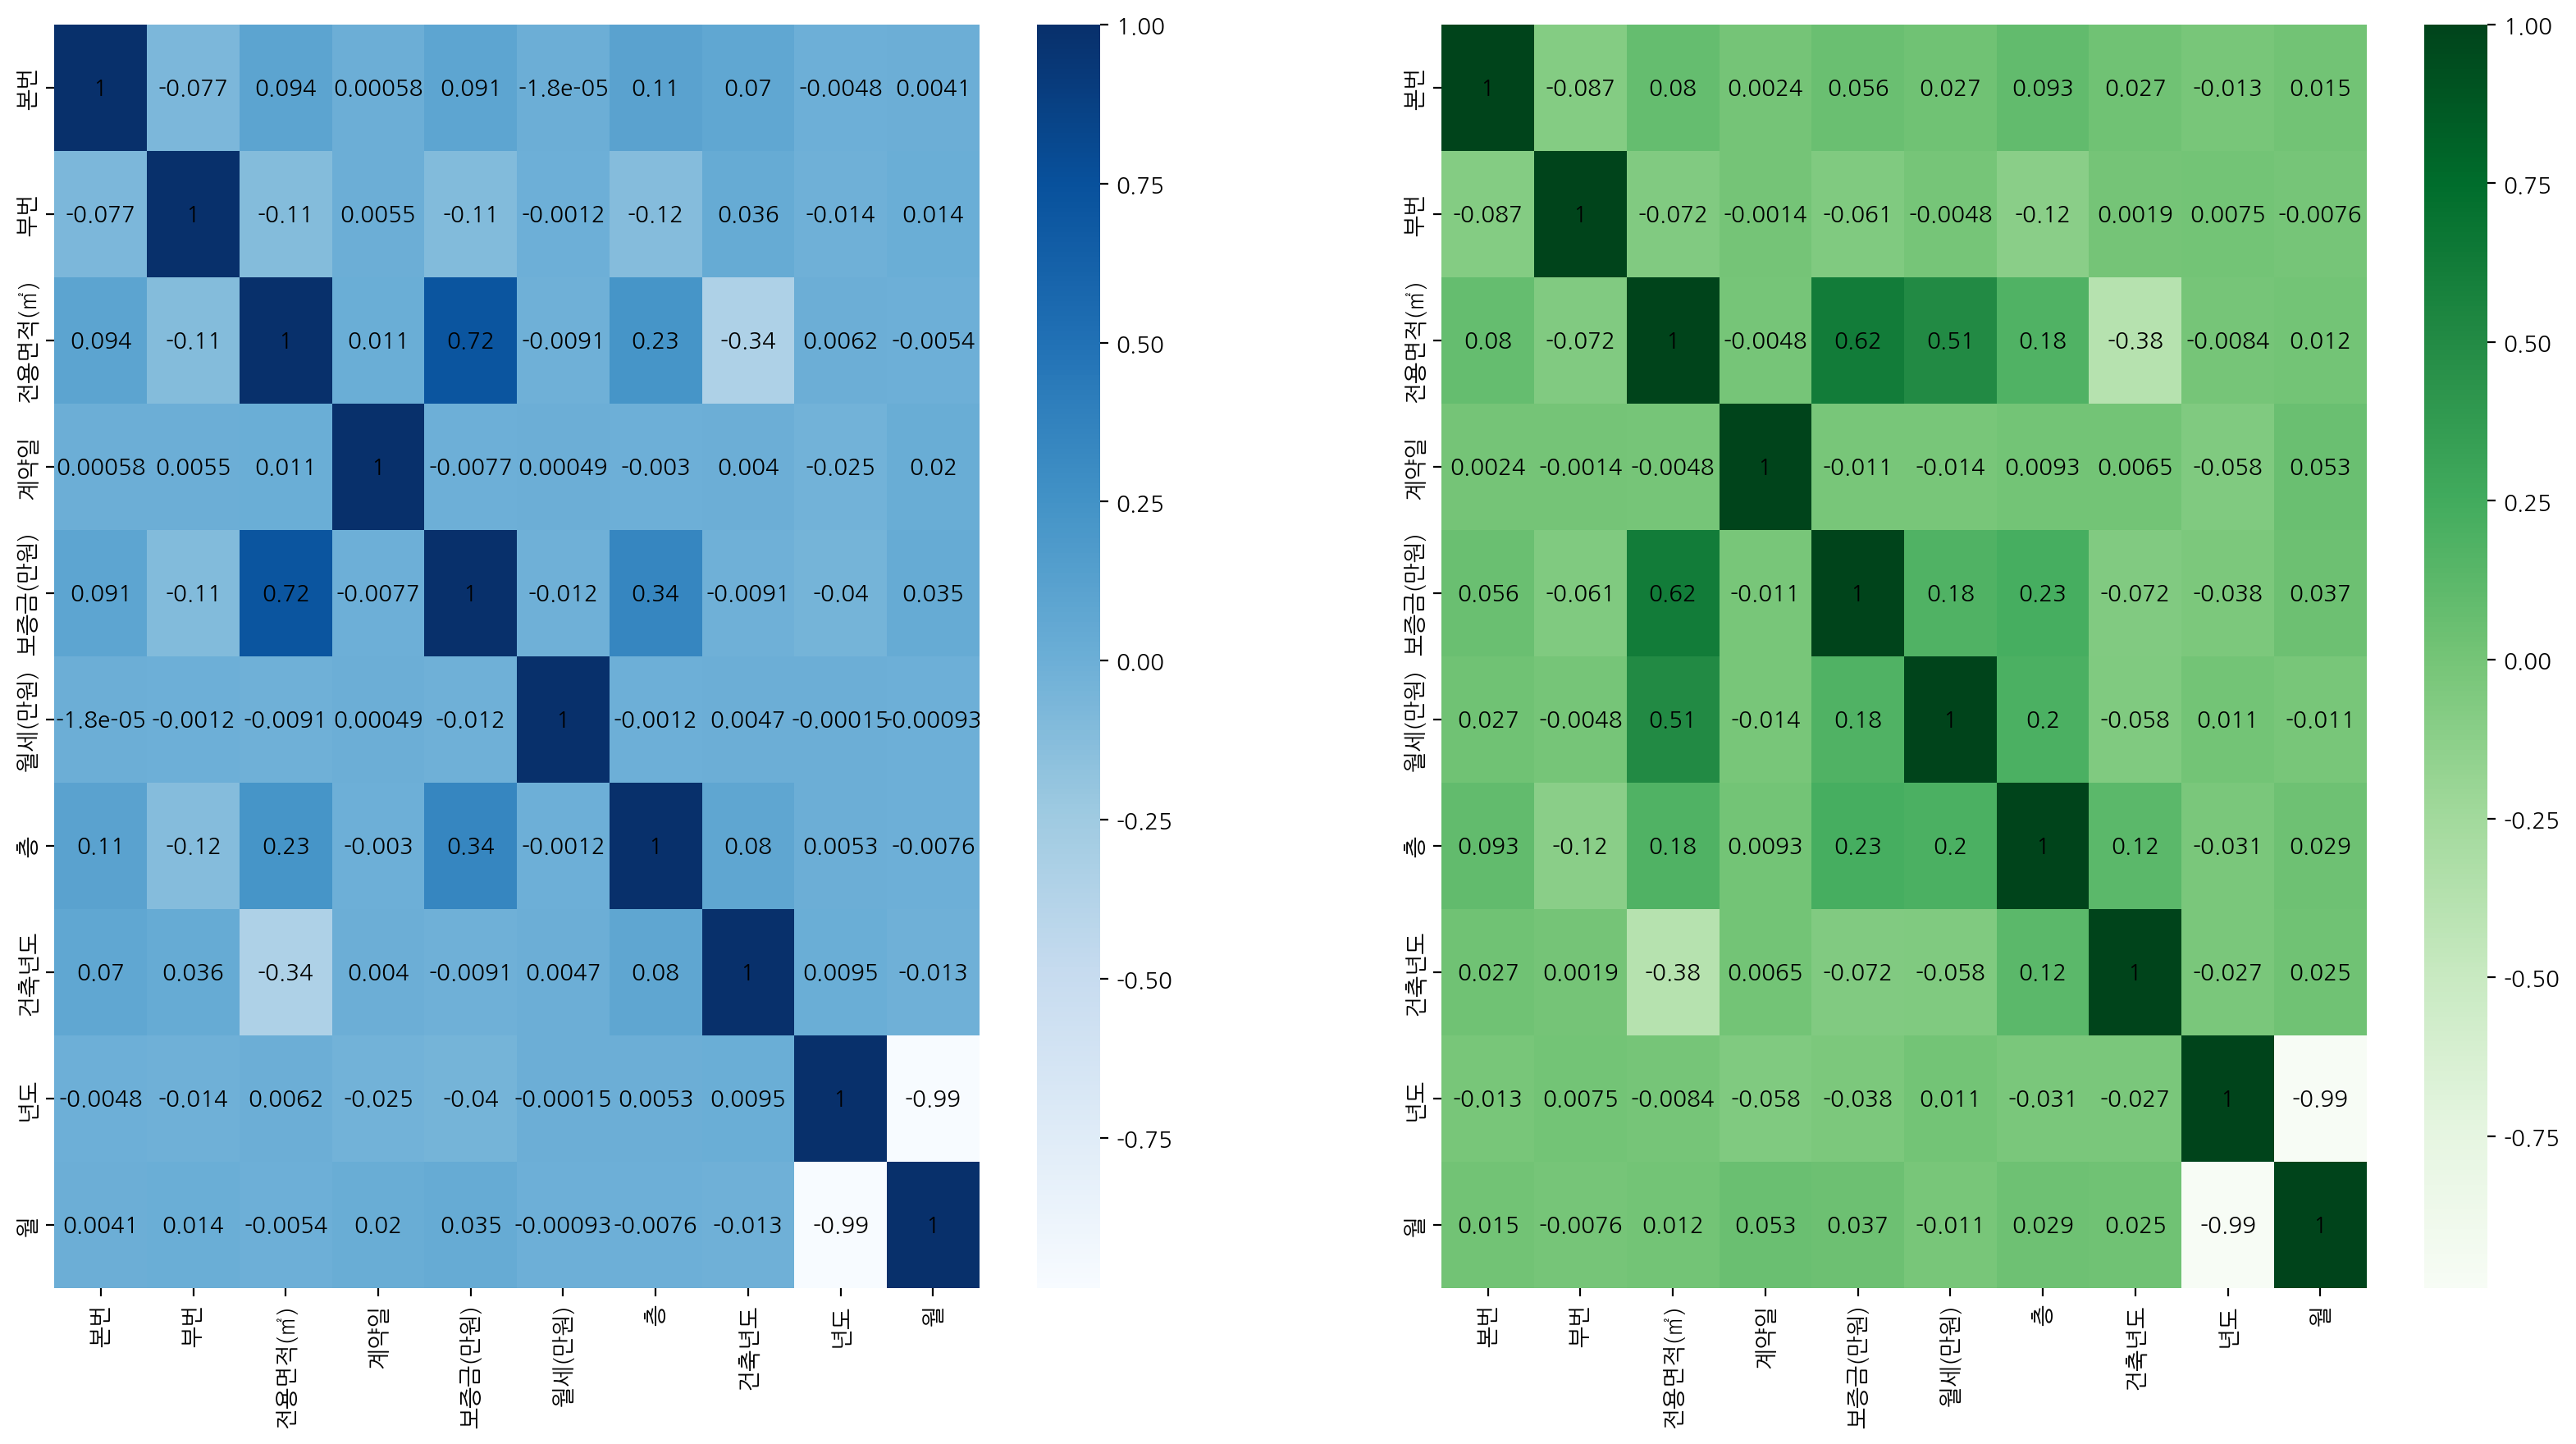

In [404]:
fig, (ax_1, ax_2) = plt.subplots(1,2, figsize=(20,10))
ax_1 = sns.heatmap(seoul_year.corr(), annot=True, annot_kws=dict(color='black'), cmap='Blues', ax = ax_1)
ax_2 = sns.heatmap(seoul_month.corr(), annot=True, annot_kws=dict(color='black'), cmap='Greens', ax = ax_2)

<ipython-input-405-e2aa5ec390b4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax_3 = sns.heatmap(gg_year.corr(), annot=True, annot_kws=dict(color='black'), cmap='Reds', ax = ax_3)
<ipython-input-405-e2aa5ec390b4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax_4 = sns.heatmap(gg_month.corr(), annot=True, annot_kws=dict(color='black'), cmap='Purples', ax = ax_4)


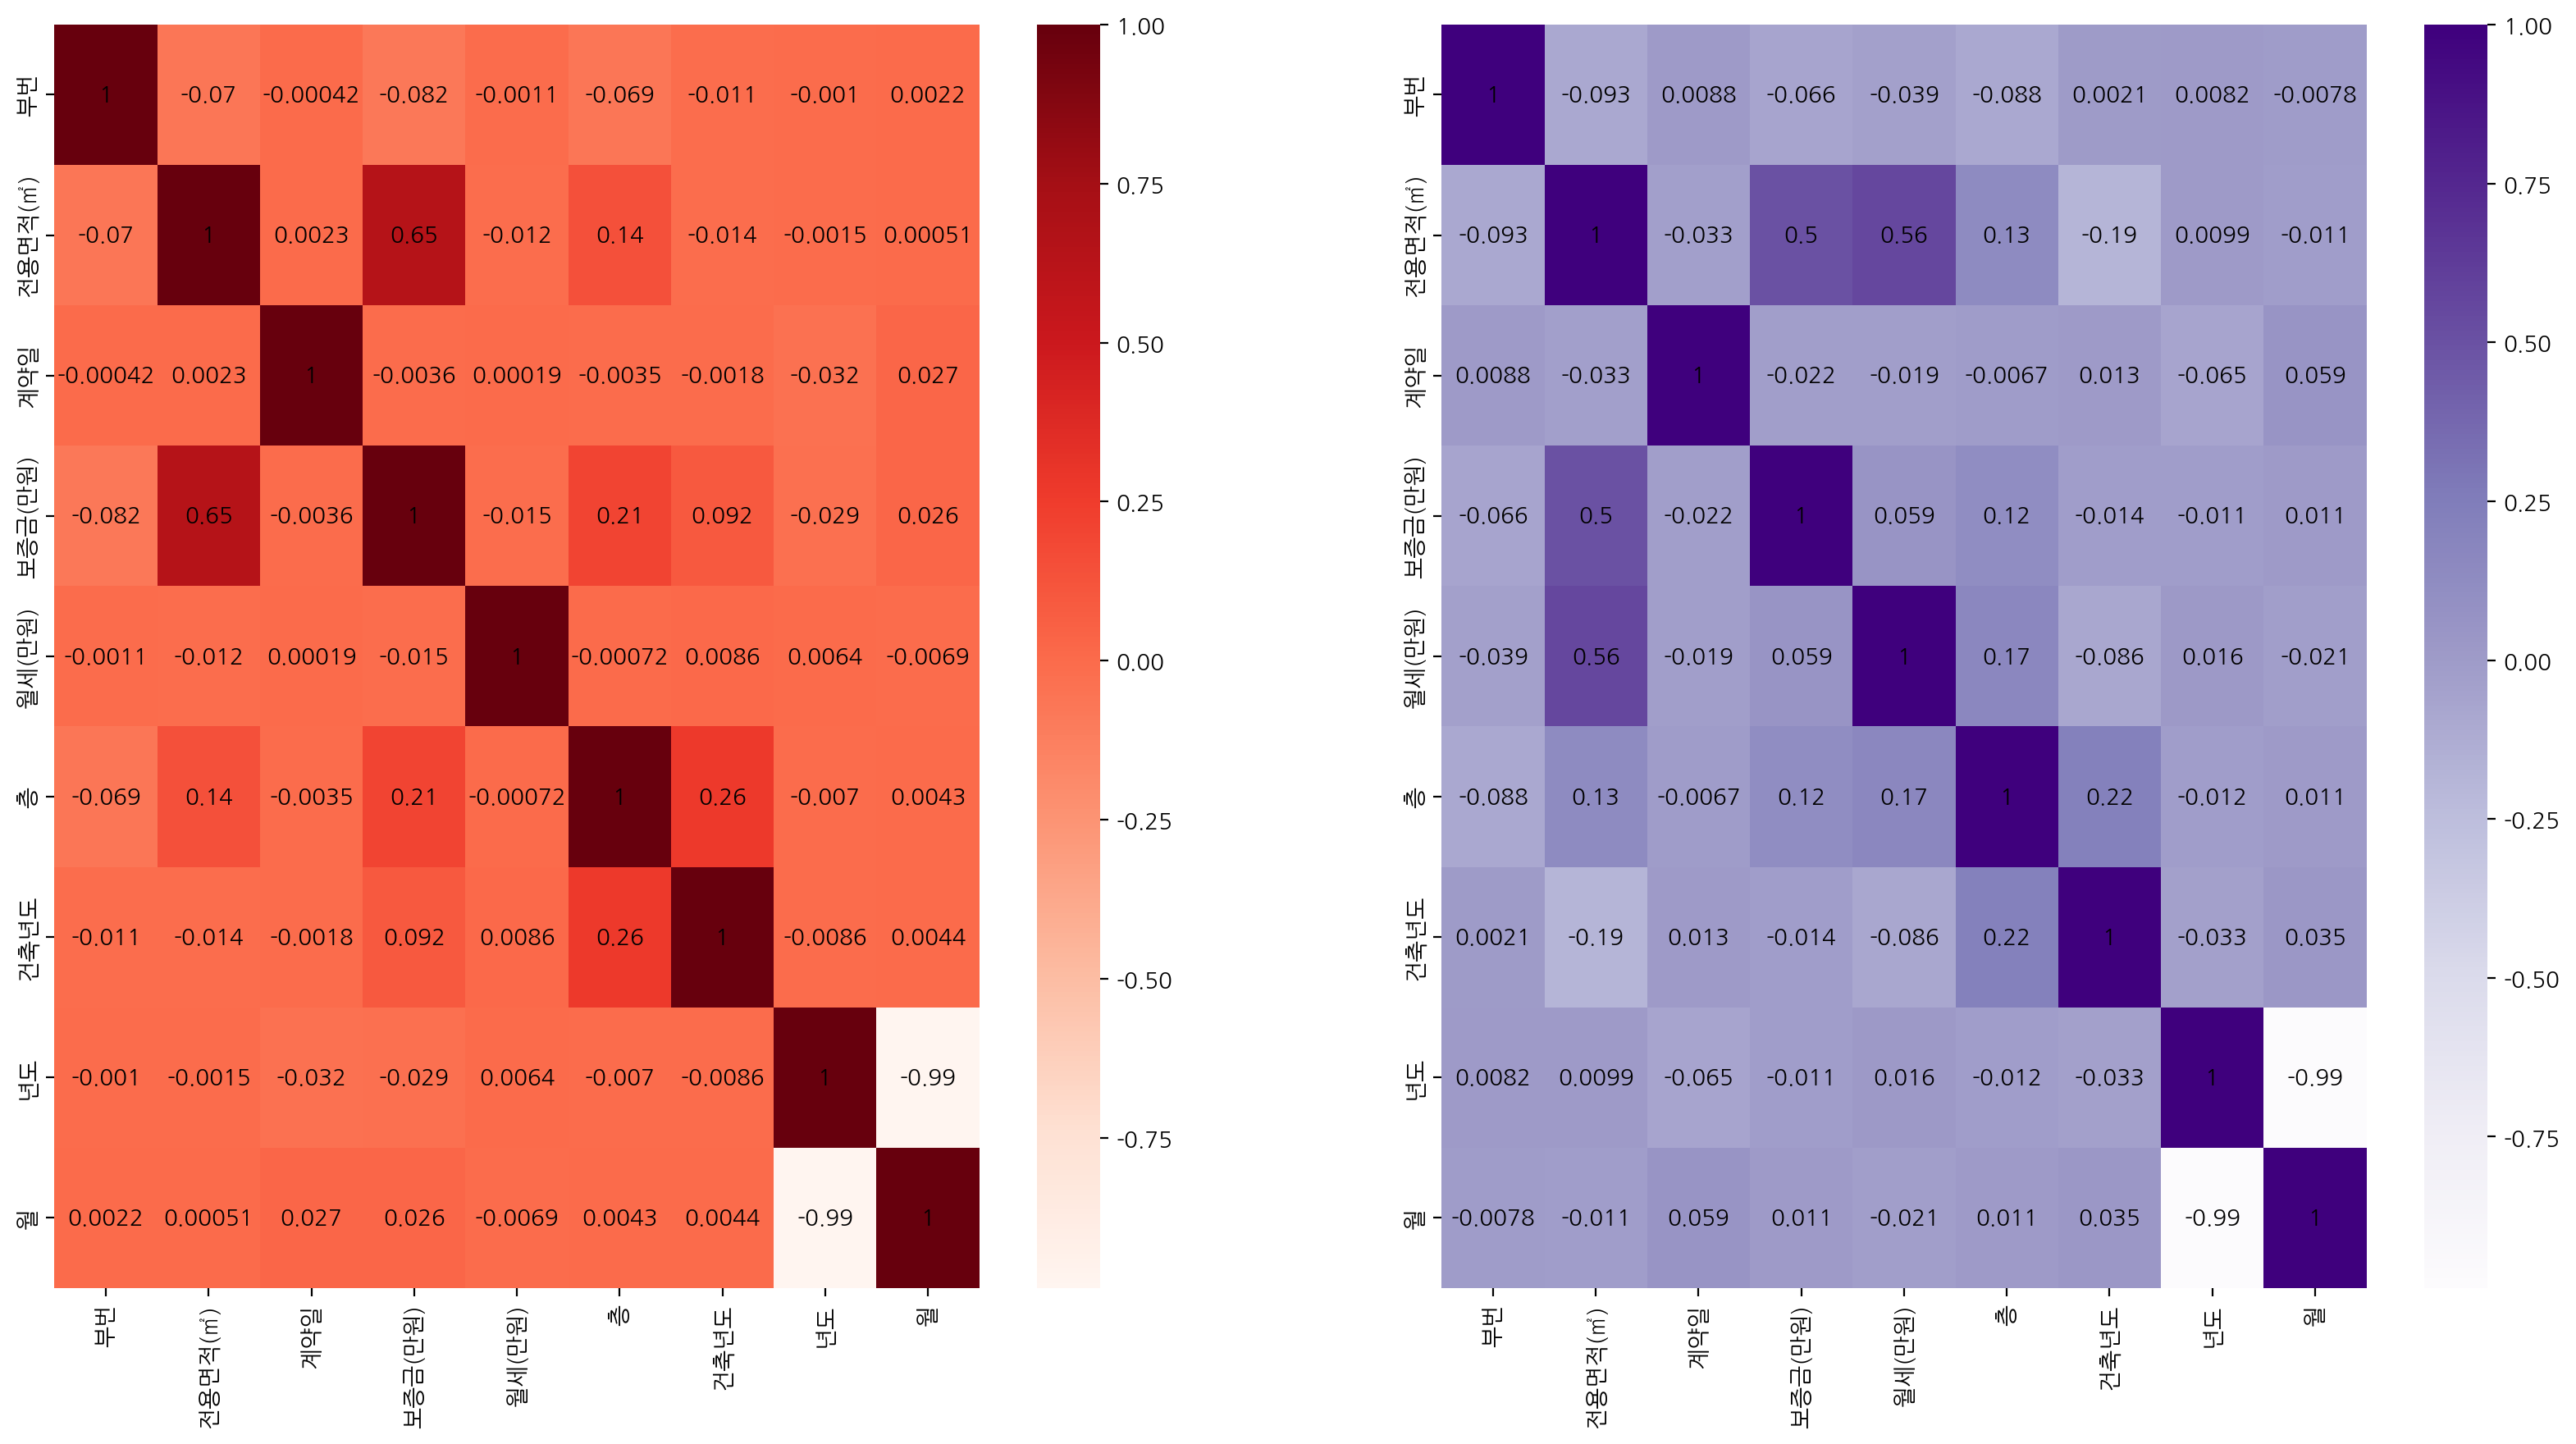

In [405]:
fig, (ax_3, ax_4) = plt.subplots(1,2, figsize=(20,10))
ax_3 = sns.heatmap(gg_year.corr(), annot=True, annot_kws=dict(color='black'), cmap='Reds', ax = ax_3)
ax_4 = sns.heatmap(gg_month.corr(), annot=True, annot_kws=dict(color='black'), cmap='Purples', ax = ax_4)

<ipython-input-406-e266acae2ad3>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=seoul_year, x="시/군/구", y="보증금(만원)", ci=None)


<Axes: xlabel='시/군/구', ylabel='보증금(만원)'>

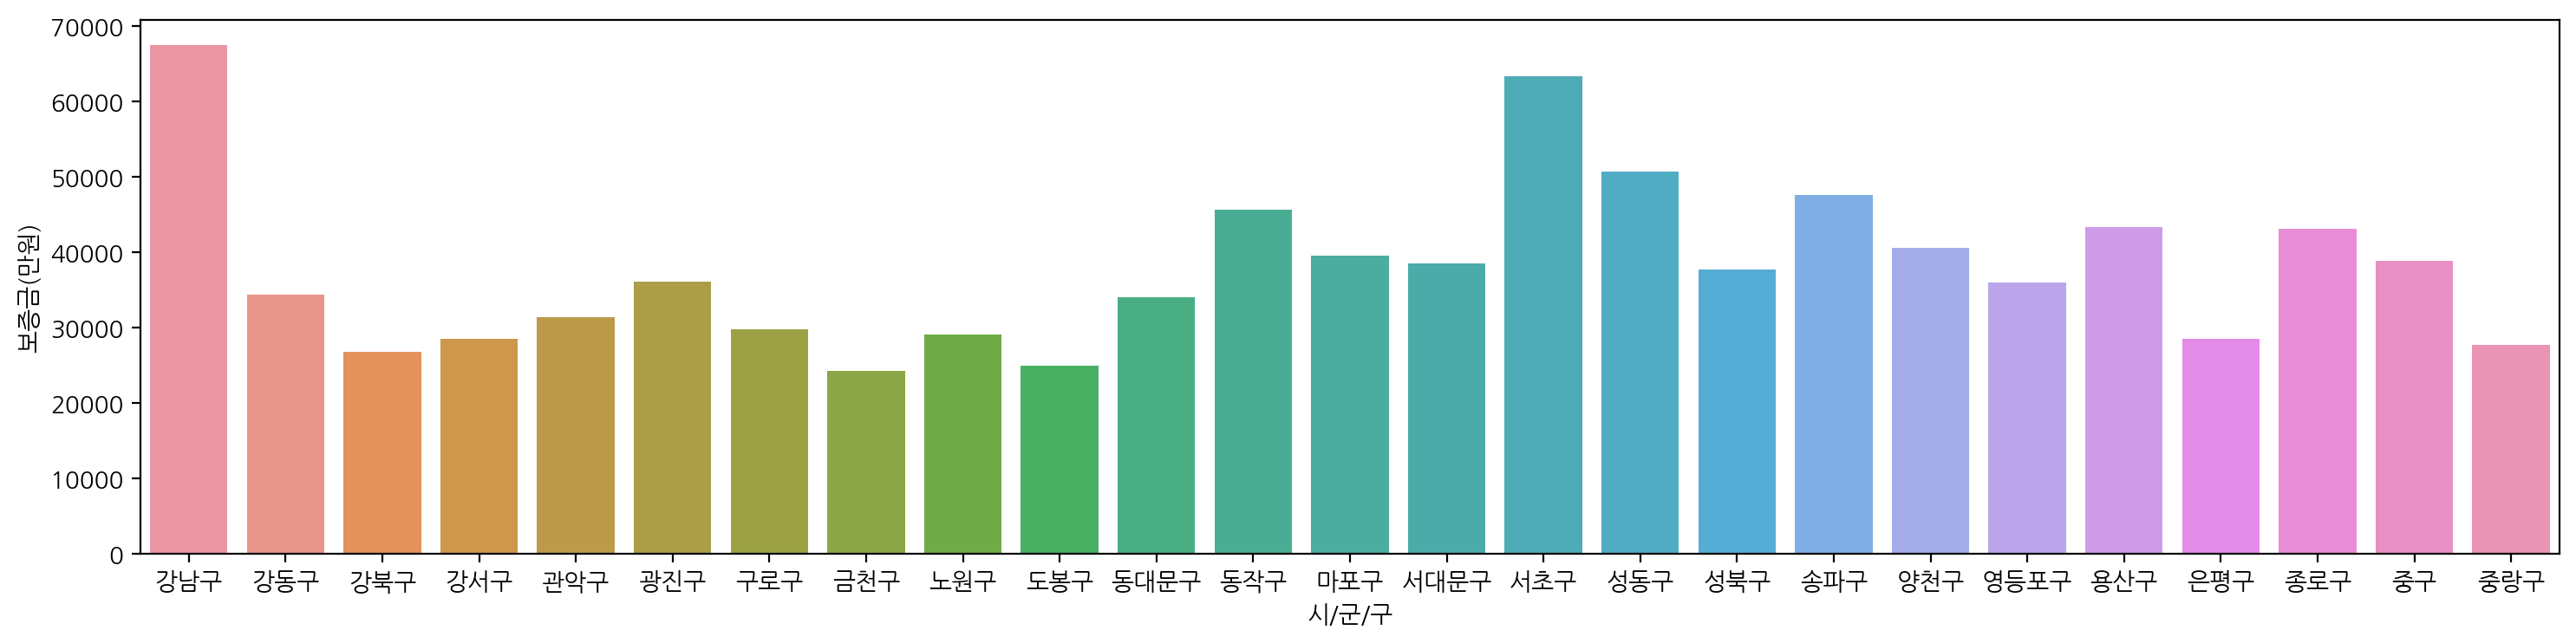

In [406]:
# 서울 지역별 평균 전세

plt.figure(figsize=(18, 4))
sns.barplot(data=seoul_year, x="시/군/구", y="보증금(만원)", ci=None)

<ipython-input-407-0ae1417281cc>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=seoul_month, x="시/군/구", y="월세(만원)", ci=None)


<Axes: xlabel='시/군/구', ylabel='월세(만원)'>

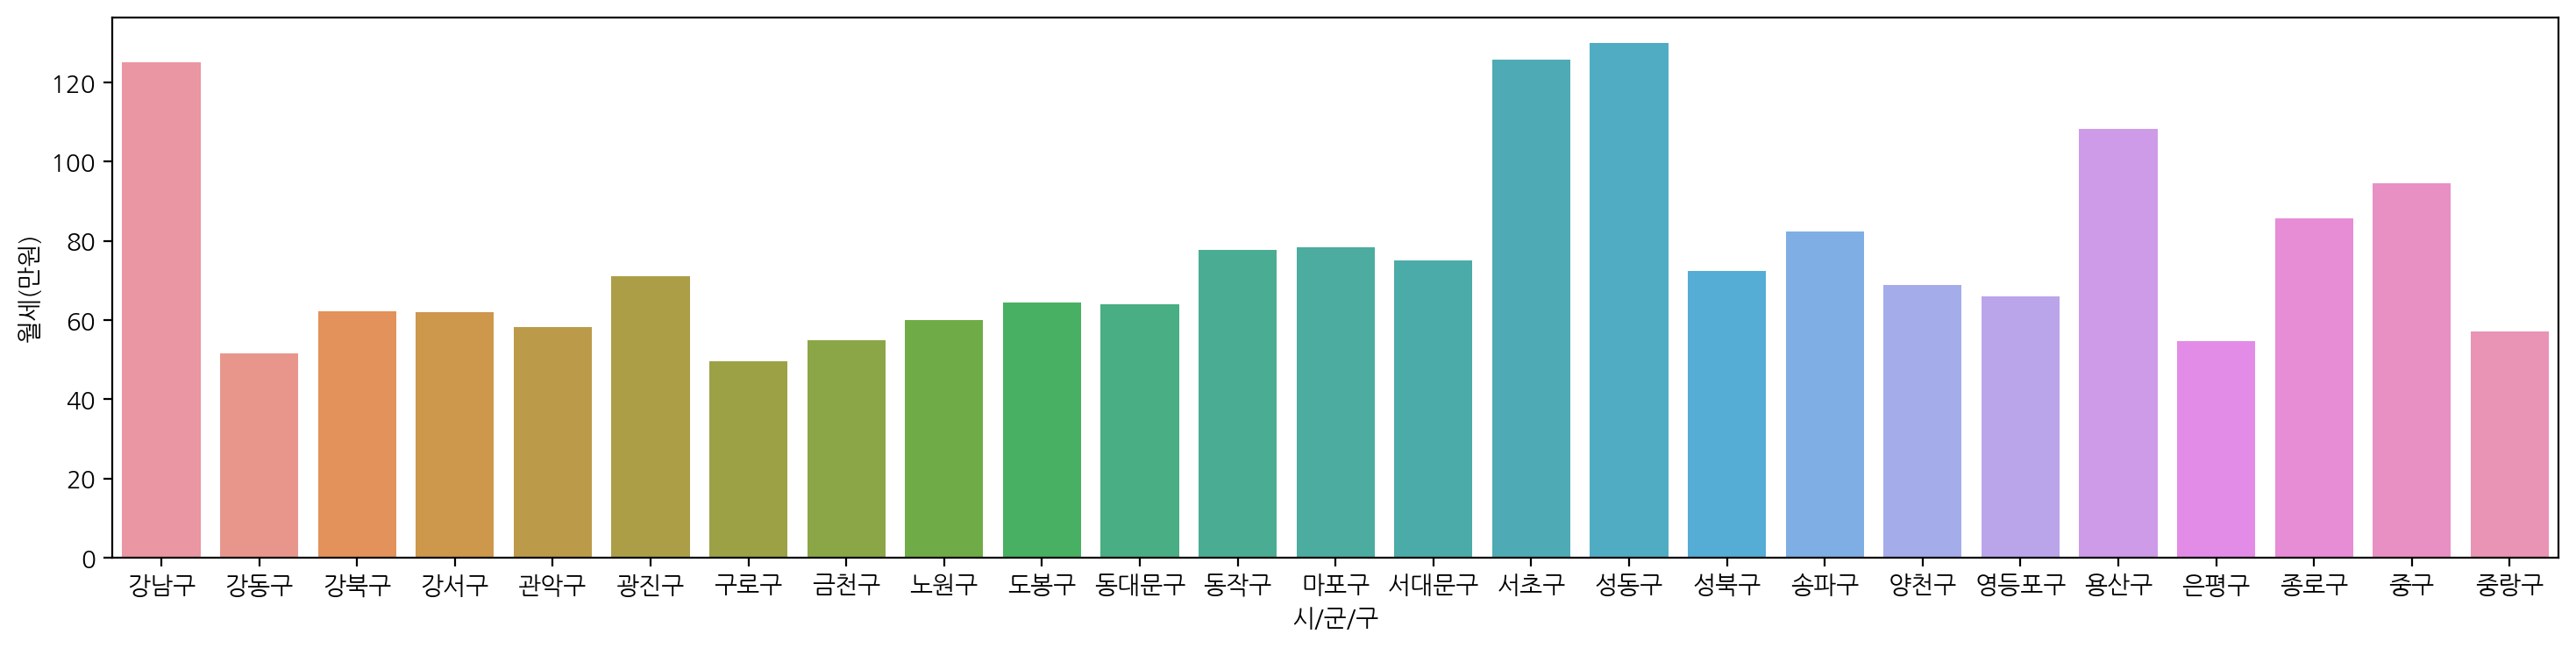

In [407]:
# 서울 지역별 평균 월세

plt.figure(figsize=(18, 4))
sns.barplot(data=seoul_month, x="시/군/구", y="월세(만원)", ci=None)

<Axes: title={'center': '경기 전세 평균 보증금'}, xlabel='시/군/구'>

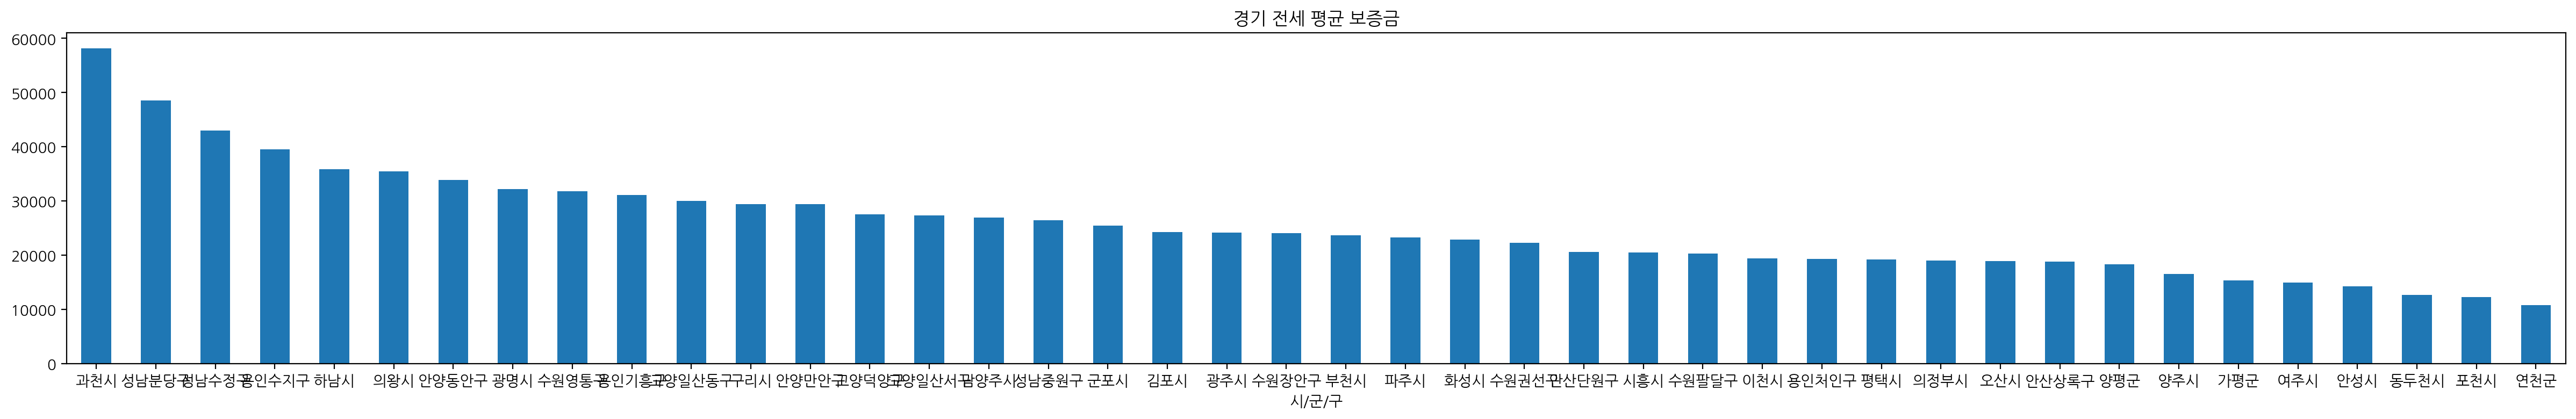

In [408]:
gg_year.groupby(by=["시/군/구"])["보증금(만원)"].mean().sort_values(ascending=False).plot(kind="bar", rot=0, title="경기 전세 평균 보증금", figsize=(30, 4))

<Axes: xlabel='시/군/구', ylabel='보증금(만원)'>

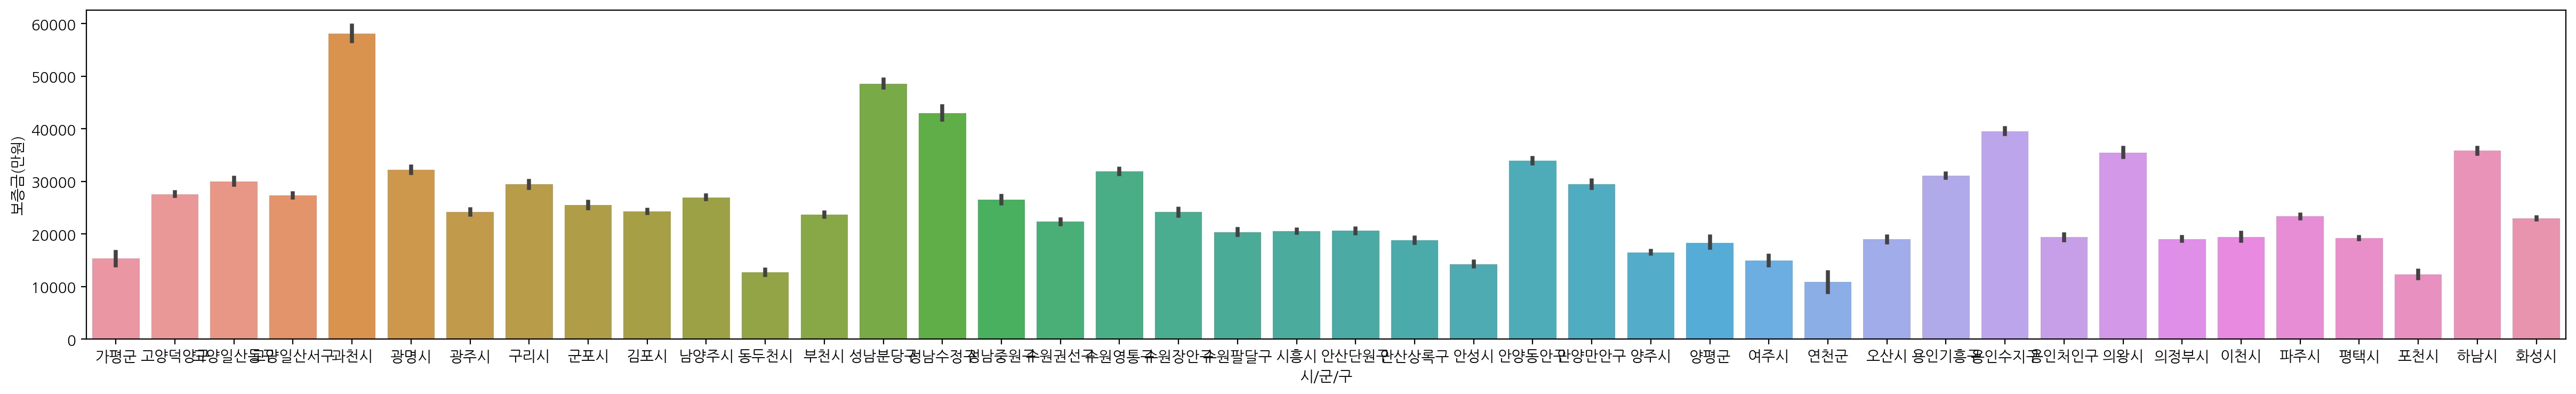

In [409]:
plt.figure(figsize=(30, 4))
sns.barplot(data=gg_year, x="시/군/구", y="보증금(만원)")

<Axes: title={'center': '경기 평균 월세'}, xlabel='시/군/구'>

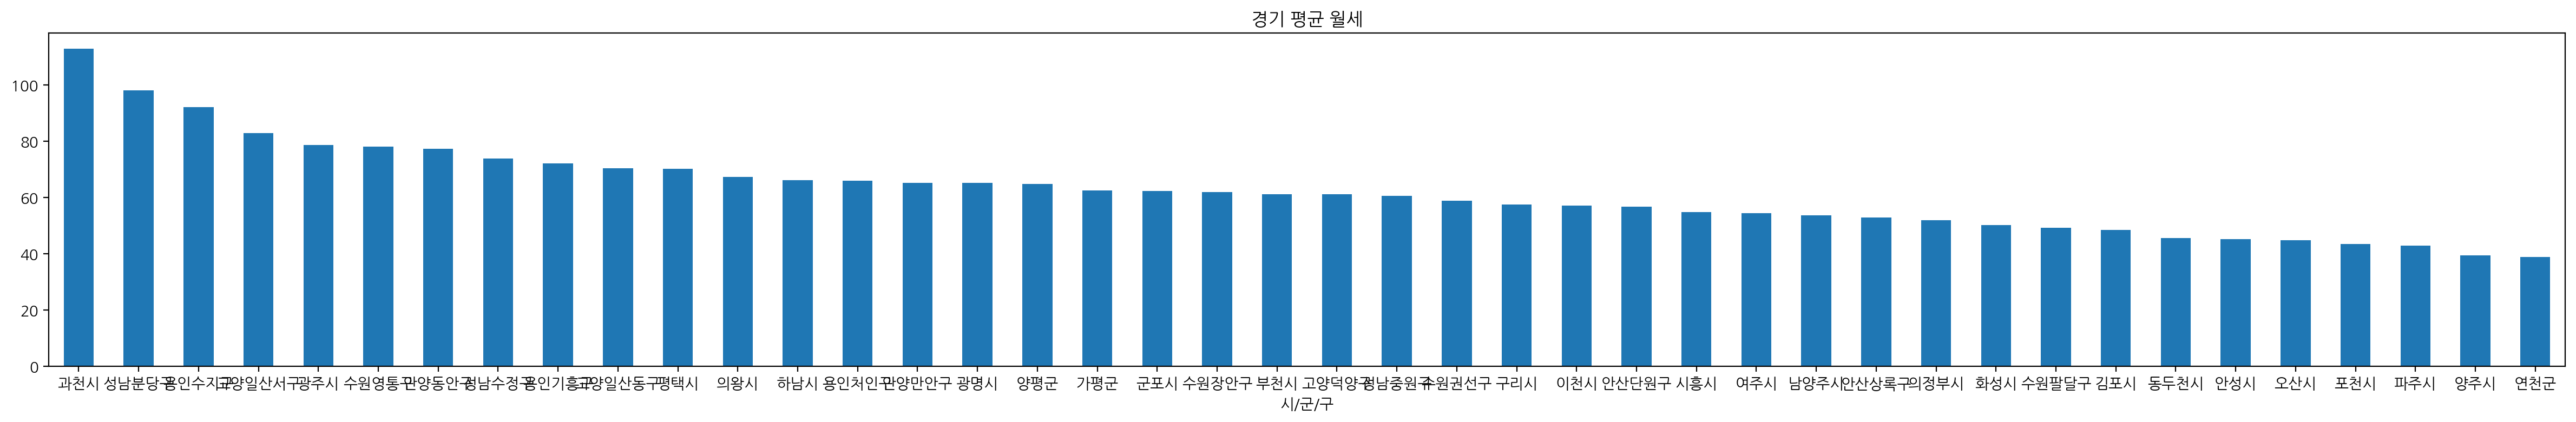

In [410]:
gg_month.groupby(by=["시/군/구"])["월세(만원)"].mean().sort_values(ascending=False).plot(kind="bar", rot=0, title="경기 평균 월세", figsize=(30, 4))

In [411]:
# m = folium.Map(location=[37.562225, 126.978555], tiles="OpenStreetMap", zoom_start=11)

# m.choropleth(
#     geo_data=state_geo,
#     data=seoul_year,
#     columns=['시/군/구', '월세(만원)'],
#     key_on='feature.properties.name',
#     fill_color='Blues',
#     fill_opacity=0.7,
#     line_opacity=0.3,
#     color = 'gray',
#     legend_name = '월세'
# )

In [412]:
seoul_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76953 entries, 0 to 37552
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시/도       76953 non-null  object 
 1   시/군/구     76953 non-null  object 
 2   동         76953 non-null  object 
 3   번지        76925 non-null  object 
 4   본번        76948 non-null  float64
 5   부번        76948 non-null  float64
 6   단지명       57167 non-null  object 
 7   전월세구분     76953 non-null  object 
 8   전용면적(㎡)   76953 non-null  float64
 9   계약일       76953 non-null  int64  
 10  보증금(만원)   76953 non-null  int64  
 11  월세(만원)    76953 non-null  int64  
 12  층         76953 non-null  int64  
 13  건축년도      76613 non-null  float64
 14  도로명       76953 non-null  object 
 15  계약기간      76953 non-null  object 
 16  계약구분      76953 non-null  object 
 17  갱신요구권 사용  76953 non-null  object 
 18  구분        76953 non-null  object 
 19  건물명       19786 non-null  object 
 20  년도        76953 non-null  in

In [413]:
seoul_.to_csv('seoul_sample.csv', encoding='cp949')
gg_.to_csv('gg_sample.csv', encoding='cp949')